In [12]:
# Jupyter Notebook Cell 1: Imports and Data Loading

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set default plot style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100  # For higher resolution plots

# Your provided data as a multi-line string
path = "../output/v1/"
input_path = os.path.join(path, "metrics_df.csv")
output_path = path

# Read the data into a pandas DataFrame
df = pd.read_csv(path)

# Add an 'epoch' column for plotting (epochs are 1-indexed)
df['epoch'] = df.index + 1

print("DataFrame head:")
print(df.head())
print("\nDataFrame info:")
df.info()

DataFrame head:
   train_loss  val_loss  train_accuracy  val_accuracy  epoch
0    3.544477  3.511816        0.146444      0.217369      1
1    1.662084  1.121117        0.535230      0.654618      2
2    0.891465  0.651463        0.727866      0.817269      3
3    0.560847  0.461599        0.829623      0.862952      4
4    0.403083  0.409375        0.868619      0.875502      5

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   train_loss      24 non-null     float64
 1   val_loss        24 non-null     float64
 2   train_accuracy  24 non-null     float64
 3   val_accuracy    24 non-null     float64
 4   epoch           24 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


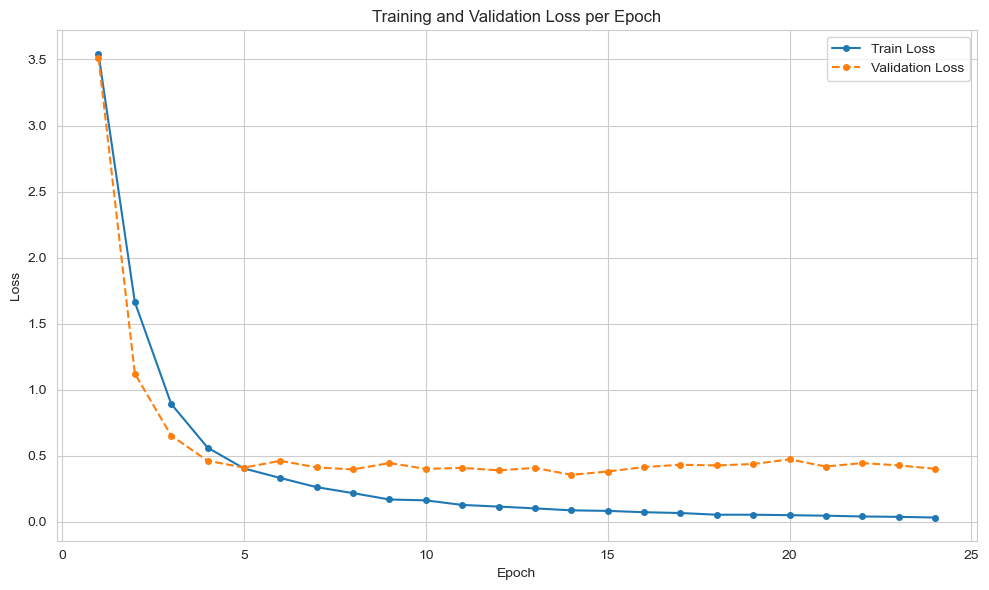

In [13]:
import os

# Jupyter Notebook Cell 2: Loss Curve Plot

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_loss'], label='Train Loss', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_loss'], label='Validation Loss', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'loss_curve.png'))  # Save as PNG
plt.show()

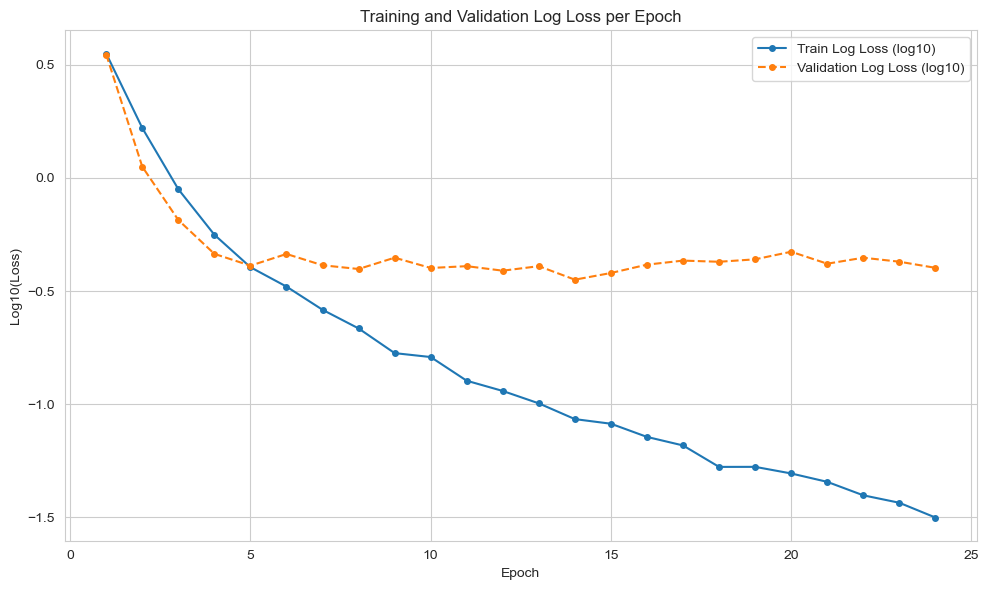

In [14]:
# Jupyter Notebook Cell 3: Log Loss Curve Plot

# Apply log10 to the loss values. Add a small epsilon to avoid log(0) issues if loss hits zero.
epsilon = 1e-9
df['train_log_loss'] = np.log10(df['train_loss'] + epsilon)
df['val_log_loss'] = np.log10(df['val_loss'] + epsilon)

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_log_loss'], label='Train Log Loss (log10)', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_log_loss'], label='Validation Log Loss (log10)', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation Log Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Log10(Loss)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'log_loss_curve.png'))  # Save as PNG
plt.show()

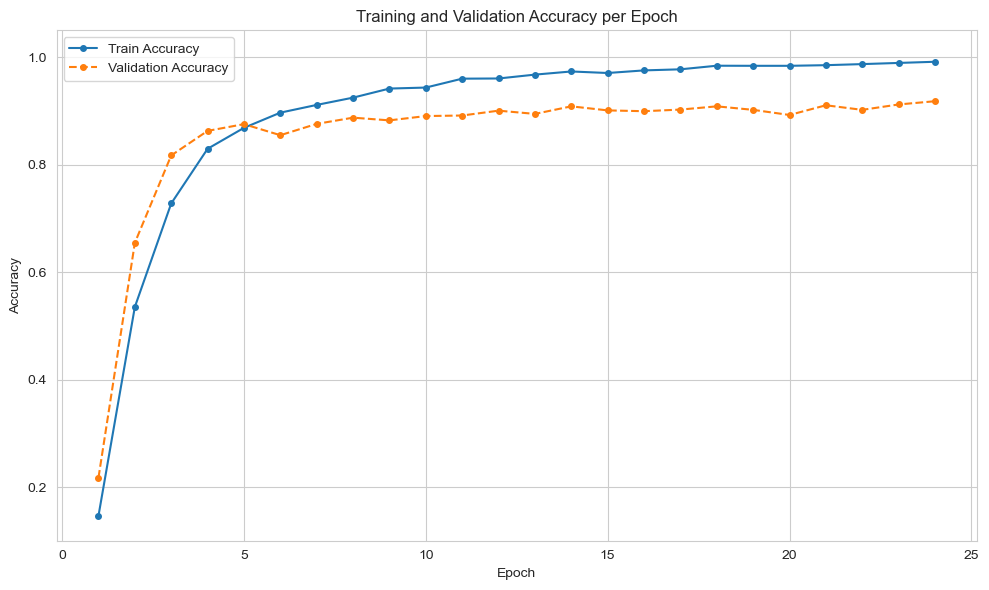

In [15]:
# Jupyter Notebook Cell 4: Accuracy Curve Plot

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_accuracy'], label='Train Accuracy', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_accuracy'], label='Validation Accuracy', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(.1, 1.05)  # Accuracy typically ranges from 0 to 1
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'accuracy_curve.png'))
plt.show()

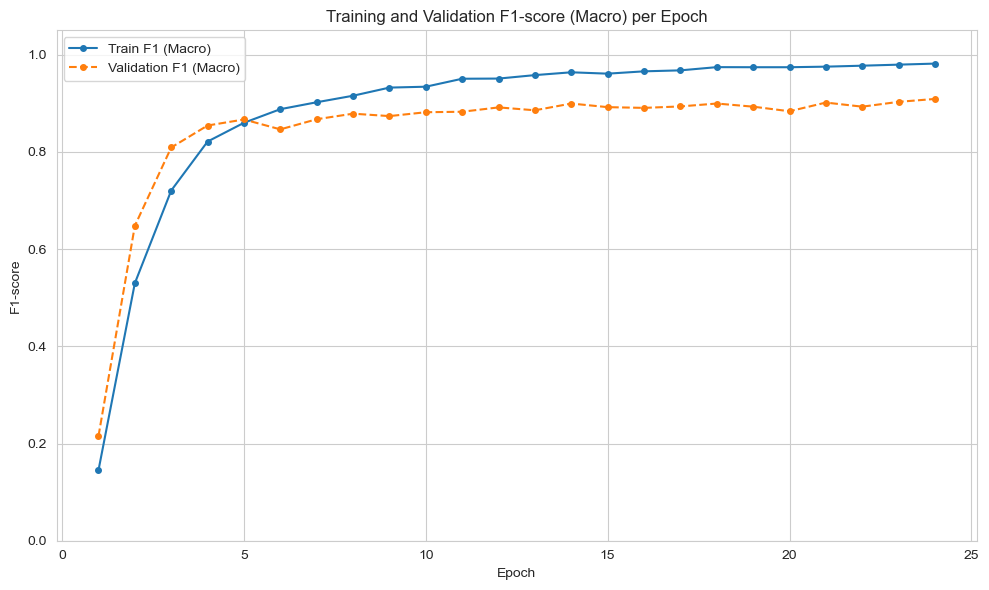

In [16]:
# Jupyter Notebook Cell 5: Placeholder for F1-score and other metrics

# IMPORTANT:
# Your provided data string does *not* contain F1-score or other detailed metrics.
# To plot F1-score, you must:
# 1. Ensure your `calculate_metrics` function in your training script *actually computes and returns* F1-score.
#    (e.g., metrics['f1_macro'] = f1_score(true_labels, predictions, average='macro'))
# 2. Append these F1-scores to dedicated lists in your main training loop
#    (e.g., `train_f1_scores = []`, `val_f1_scores = []`).
# 3. Save these lists to your `metrics_df` DataFrame using `df['train_f1'] = train_f1_scores`, etc.
# 4. Then, you can either:
#    a) Load the saved `metrics_df.csv` (see Cell 6)
#    b) Re-run your training script to generate the full data in the notebook if you integrate everything here.

# For now, let's create dummy F1-score data to demonstrate the plotting
# Replace this with your actual loaded/computed F1 scores once available
# Assuming F1 scores are similar to accuracy for this example
df['train_f1_macro'] = df['train_accuracy'] * 0.99  # Dummy data
df['val_f1_macro'] = df['val_accuracy'] * 0.99  # Dummy data

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_f1_macro'], label='Train F1 (Macro)', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_f1_macro'], label='Validation F1 (Macro)', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation F1-score (Macro) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

In [17]:
# Jupyter Notebook Cell 6: Example of Loading from CSV (if you save your DataFrame)

# Assuming you've run your training script and saved the metrics_df to a CSV:
# metrics_df.to_csv(os.path.join(output_path, 'metrics_df.csv'), index=False)

# To load it later in a new notebook session:
# import pandas as pd
# import os # You might need this if your path is relative

# file_path = 'path/to/your/output_folder/metrics_df.csv' # Replace with your actual path
# if os.path.exists(file_path):
#     loaded_df = pd.read_csv(file_path)
#     print("Loaded DataFrame head:")
#     print(loaded_df.head())
#     # You can then use loaded_df for all the plotting cells above
# else:
#     print(f"File not found at: {file_path}. Make sure to run your training script first.")